## 0. Use the iris database to answer the following quesitons:

What does the distribution of petal lengths look like?

Is there a correlation between petal length and petal width?

Would it be reasonable to predict species based on sepal width and sepal length?

Which features would be best used to predict sp

In [71]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pydataset import data


In [2]:
ir = sns.load_dataset('iris')
ir.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


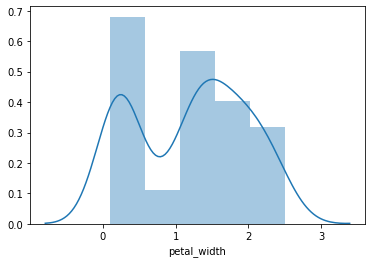

In [3]:
# What does the distribution of petal lengths look like?
sns.distplot(ir["petal_width"])

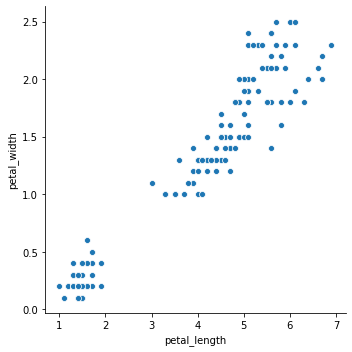

In [4]:
# Is there a correlation between petal length and petal width?
sns.relplot(x='petal_length', y='petal_width', data=ir)

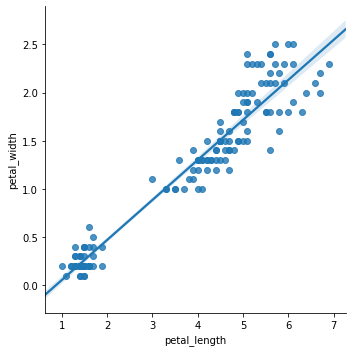

In [5]:
sns.lmplot(x='petal_length', y='petal_width', data=ir)

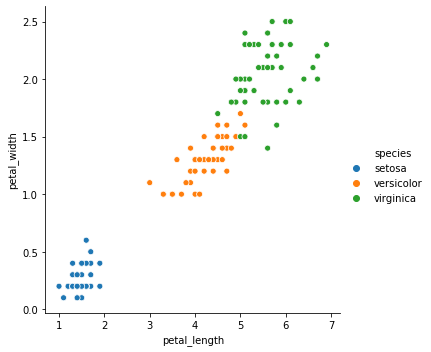

In [6]:
# Would it be reasonable to predict species based on sepal width and sepal length?
sns.relplot(x='petal_length', y='petal_width', data=ir, hue= "species")

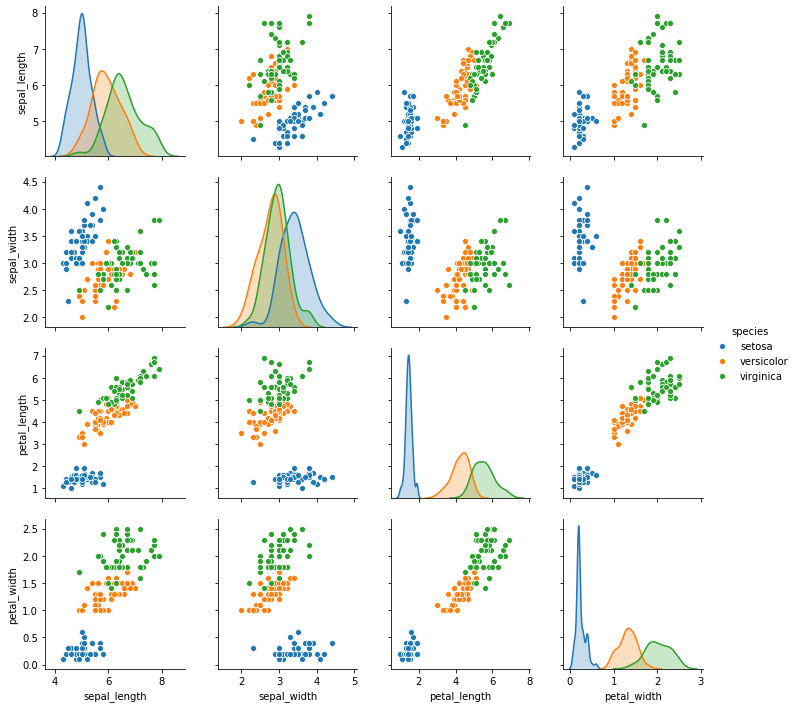

In [7]:
# Which features would be best used to predict species?
sns.pairplot(ir, hue='species')

#pedal_width and Pedal_length

## 1. Use seaborn's load_dataset function to load the anscombe data set.
Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?

Plot the x and y values from the anscombe data. Each dataset should be in a separate column.



In [8]:
anscombe = sns.load_dataset('anscombe')
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [9]:
# 1.Use pandas to group the data by the dataset column, 
#and calculate summary statistics for each dataset.
#What do you notice?
anscombe.groupby('dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

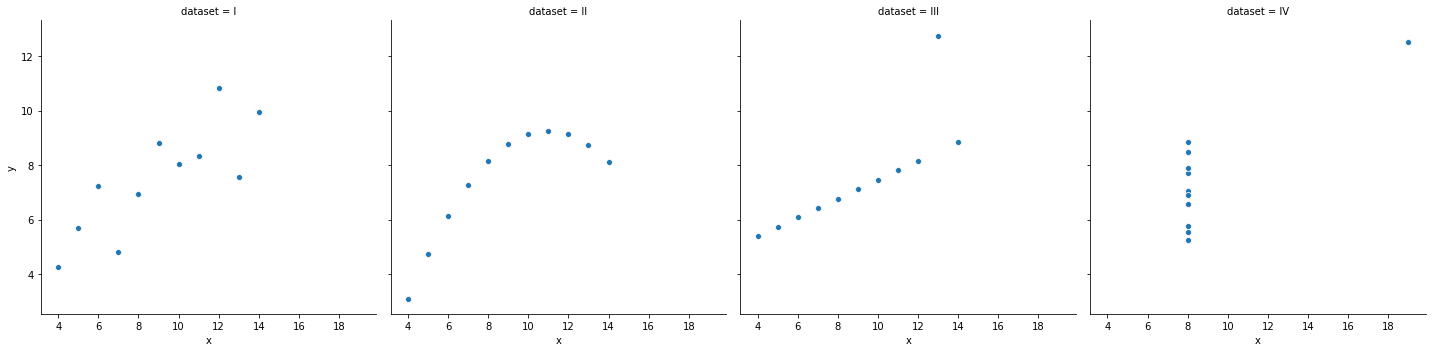

In [10]:
# 2.Plot the x and y values from the anscombe data. 
#Each dataset should be in a separate column.
sns.relplot(x = "x", y = 'y', data = anscombe, col = 'dataset')

## 2. Load the InsectSprays dataset and read it's documentation.
Create a boxplot that shows the effectiveness of the different insect sprays.

In [11]:
insect_sprays = data('InsectSprays')
insect_sprays.sample(5)

,count,spray
70,26,F
48,4,D
10,20,A
42,3,D
41,4,D


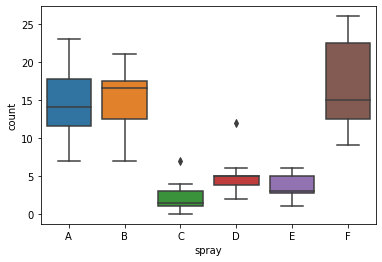

In [12]:
#data("InsectSprays", show_doc = True)
sns.boxplot(data = insect_sprays, y = 'count', x = 'spray')

## 3. Load the swiss dataset and read it's documentation.

In [65]:
swiss = data('swiss')
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


In [60]:
#1. Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. 
# Choose a cutoff point for what constitutes catholic
swiss['is_catholic'] =  swiss.Catholic > 70


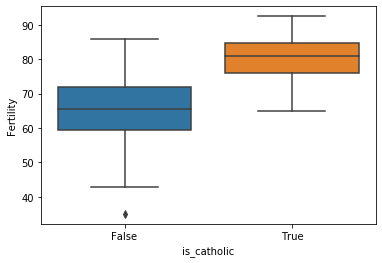

In [48]:
# 2. Does whether or not a province is Catholic influence fertility?
sns.boxplot(y = 'Fertility',x = 'is_catholic',data = swiss)

#It i

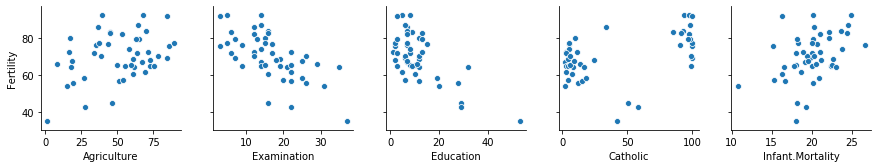

In [63]:
#3. What measure correlates most strongly with fertility?
sns.pairplot(swiss, x_vars = ['Agriculture', 'Examination', 'Education', 'Catholic',
       'Infant.Mortality'],  y_vars = 'Fertility')
# education has the most correlation

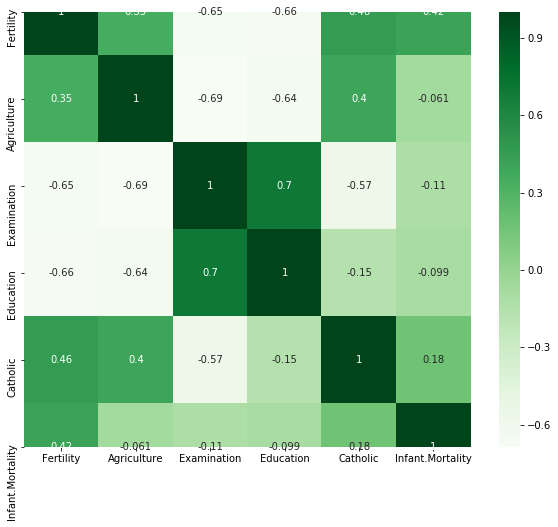

In [80]:
sns.heatmap(swiss.corr(), annot=True, cmap='Greens')

## 4. Using the chipotle dataset from the previous exercise
create a bar chart that shows the 4 most popular items and the revenue produced by each.

In [148]:
def get_db_url(db_name):
    from env import host, user, password
    url = f'mysql+pymysql://{user}:{password}@{host}/{db_name}'
    return url
query = 'SELECT * FROM orders'
orders = pd.read_sql(query, get_db_url('chipotle'))

orders = orders[['item_name','quantity', 'item_price']]
orders.item_price = orders.item_price.str.replace('$', '').astype('float')
orders = orders.groupby('item_name').agg({'quantity': 'sum', 'item_price': 'sum'}).nlargest(4, 'quantity')
orders = orders.reset_index(col_level=0)
orders 

,item_name,quantity,item_price
0,Chicken Bowl,761,7342.73
1,Chicken Burrito,591,5575.82
2,Chips and Guacamole,506,2201.04
3,Steak Burrito,386,3851.43


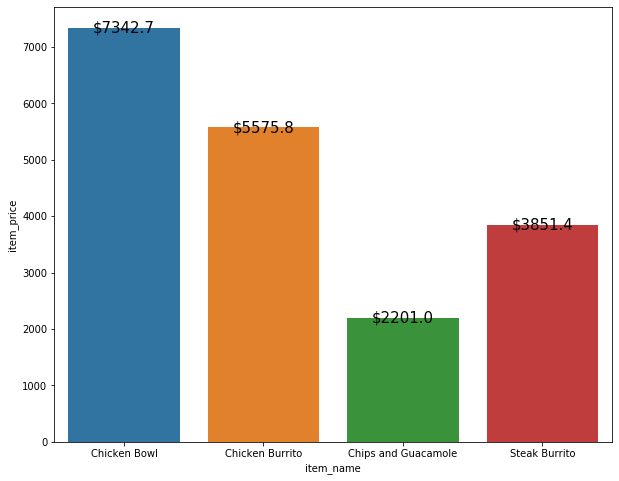

In [198]:
sns.barplot(data = orders, x = 'item_name', y = 'item_price')

for i,num in enumerate(orders.item_price):
    plt.text(
        i,
        num,
        f'${num:.1f}',
        ha='center',
        va='center',
        color='black',
        fontsize=15
    )



## 5. Load the sleepstudy data and read it's documentation. 
Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.

In [210]:
sleepstudy = data('sleepstudy')
sleepstudy.sample(5)

,Reaction,Days,Subject
75,279.0244,4,334
78,331.5229,7,334
132,298.1939,1,352
152,234.5235,1,370
40,354.0487,9,330


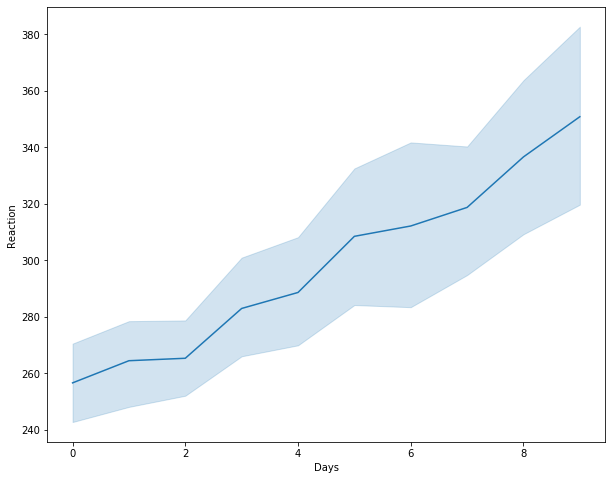

In [217]:
sns.lineplot(x = 'Days', y = 'Reaction', data = sleepstudy )